#  Linear Regression with Python

** This is mostly just code for reference. Please watch the video lecture for more info behind all of this code.**

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [158]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
from plotly import __version__
print(__version__) # version =>1.9.0

3.5.0


In [45]:
from plotly.offline import download_plotlyjs, iplot ,plot ,init_notebook_mode

In [50]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
USa_Housing = pd.read_csv('USA_Housing.csv')

In [3]:
USa_Housing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
USa_Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
USa_Housing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

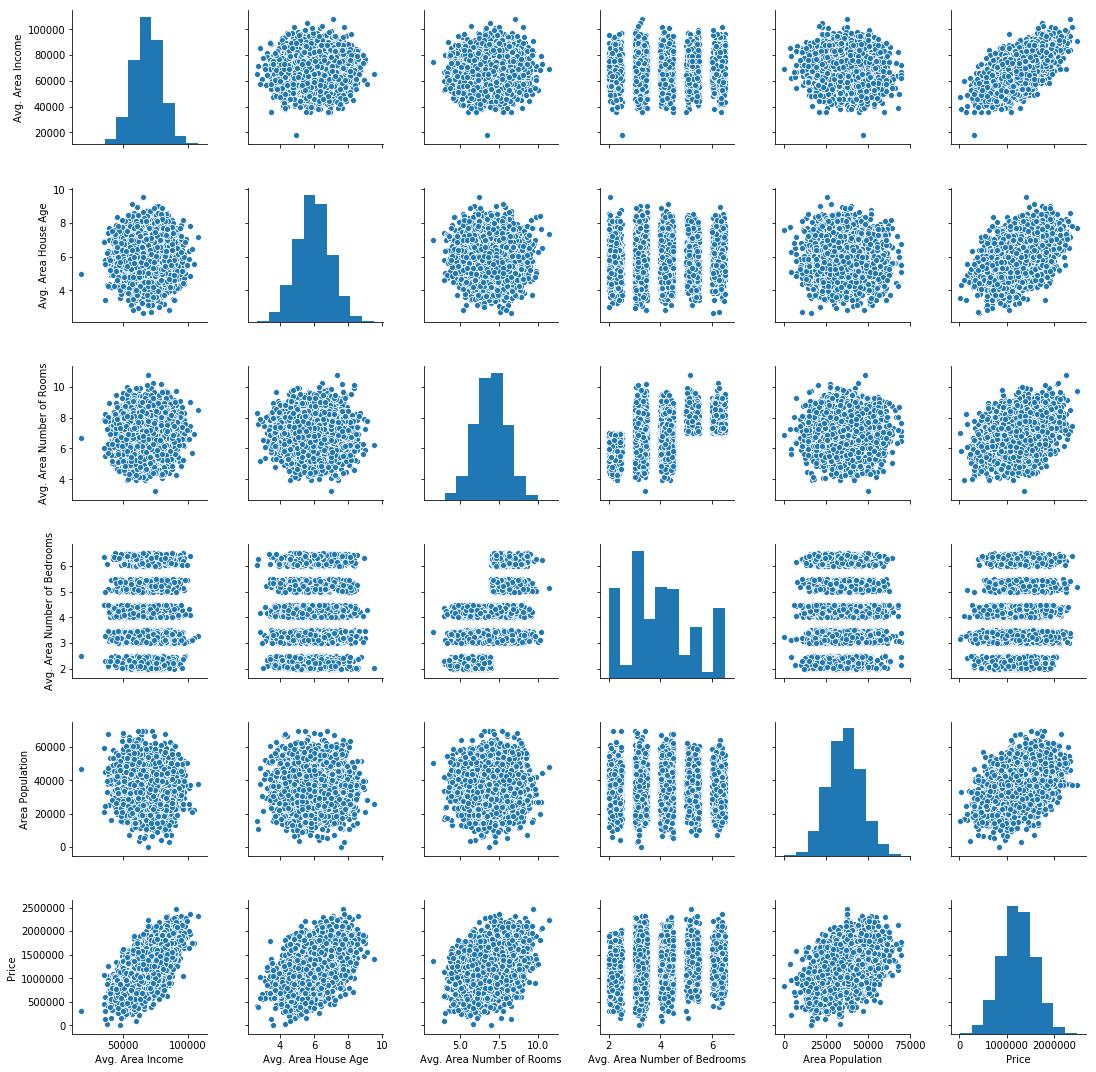

In [6]:
sns.pairplot(USa_Housing)

C:\Users\negi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


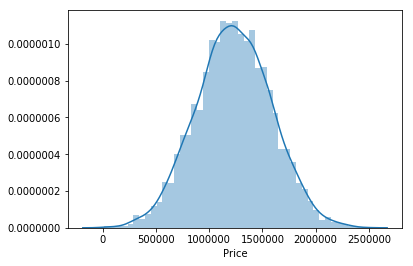

In [7]:
sns.distplot(USa_Housing['Price'])

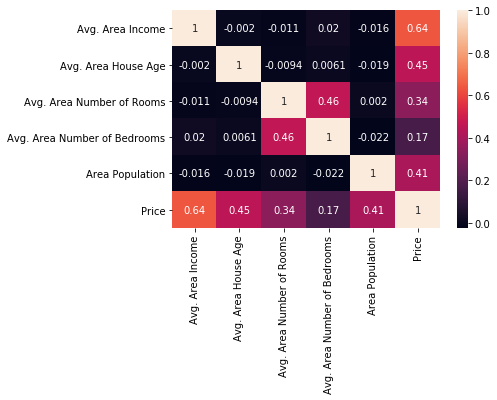

In [8]:
sns.heatmap(USa_Housing.corr(),annot=True)

# TRANING AND TESTING 

In [111]:
USa_Housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [112]:
x =  USa_Housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [113]:
y = USa_Housing['Price']

Train and split

In [114]:
from sklearn.model_selection import train_test_split

In [137]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=101)

In [138]:
from sklearn.linear_model import LinearRegression 

In [139]:
lm = LinearRegression()

In [140]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Model  evaluation

In [150]:
# print the intercept
print(lm.intercept_)

-2636212.9729401446


In [142]:
lm.coef_
USa_Housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [143]:
coef_df = pd.DataFrame(data=lm.coef_ ,index=x.columns,columns=[ '1_unit_increase'])
coef_df

1_unit_increase
Avg. Area Income                    21.527435
Avg. Area House Age             163813.349215
Avg. Area Number of Rooms       122376.422344
Avg. Area Number of Bedrooms      1327.089080
Area Population                     15.292655

### PREDICTIONS FROM OUR MODEL 

In [144]:
predictions = lm.predict(X_test)


In [145]:
df = pd.DataFrame()
df['predictions']=predictions
df['y_test']=y_test.values # value of y_test
df.iplot( y='y_test',x='predictions' ,mode ='markers')



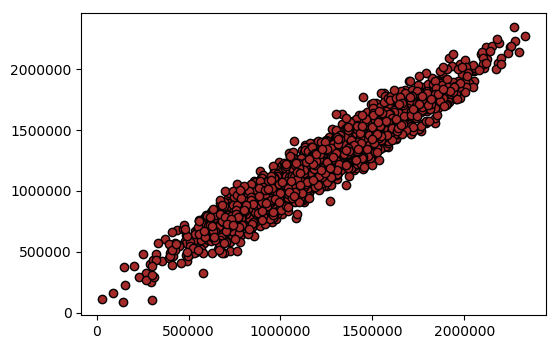

In [146]:
fig = plt.figure(dpi=100)
plt.scatter(y_test,predictions ,color='brown', marker='o',edgecolors='black' ,alpha=1)

C:\Users\negi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



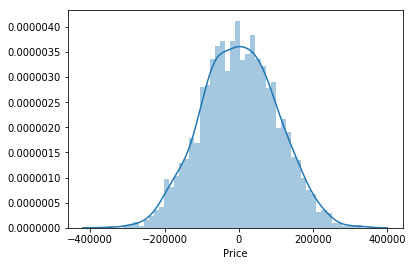

In [151]:
sns.distplot(predictions-y_test,bins=50)

In [152]:
from sklearn  import metrics

In [153]:
metrics.mean_squared_error(y_test,predictions)

10408954322.498852

In [154]:
metrics.mean_absolute_error(y_test,predictions)

82370.2117740494

In [159]:
np.sqrt(metrics.mean_absolute_error(y_test,predictions))

287.00211109685137